# UT2000 Weather Patterns
This notebook is meant to import weather data from UT's weather station to determine what the conditions in Austin were like during the study. The primary reason for this is to see how the temperature and relative humidty respond on the Beacons in participants' homes.

[Data Import and Pre-Processing](#Data-Import)

[Data Visualization](#Data-Visualization)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Data Import

In [24]:
# importing and setting datetime index
weather_raw = pd.read_csv('/Users/hagenfritz/Projects/utx000/data/external/UTPD_Wx_Station/utweather_5min_12192018-06032020.csv',
                         parse_dates = [[0,1]],infer_datetime_format=True,index_col=0)
# getting correct timeframe
weather_condensed = weather_raw[datetime(2019,3,16):datetime(2019,4,2,23)]
# selecing important vars
weather_final = weather_condensed[['Out Temp','Out Hum','Dew Pt','Wind Speed','Rain']]
# converting all dtypes to numeric
for column in weather_final.columns:
    weather_final[column] = pd.to_numeric(weather_final[column],errors='coerce')
# output of final weather dataframe
weather_final.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Out Temp,Out Hum,Dew Pt,Wind Speed,Rain
Date_ Time,,,,,
2019-03-16 00:05:00,51.7,45,31.0,2,0.0
2019-03-16 00:10:00,51.8,44,30.6,2,0.0
2019-03-16 00:15:00,51.8,44,30.6,2,0.0
2019-03-16 00:20:00,51.8,43,30.0,1,0.0
2019-03-16 00:25:00,51.6,44,30.4,1,0.0


## Pre-processing
Now we have to rearrange the data so that we have it in a format to plot with a heatmap. There are a few weather metrics that we are interested in so we create a function that generates the dataframes for us.

In [29]:
def get_heatmappable_df(df, var_name):
    '''
    
    '''
    # creating day and hour columns to pivot with
    df['Day'] = df.index.date
    df['Hour'] = df.index.hour
    # pivoting and returning
    pivot_df = df.pivot_table(index='Day',columns='Hour',values=var_name)
    
    return pivot_df

In [32]:
# getting the dataframes to plot
temperature = get_heatmappable_df(weather_final, 'Out Temp')
humidity = get_heatmappable_df(weather_final, 'Out Hum')
dpt = get_heatmappable_df(weather_final, 'Dew Pt')
wind_spd = get_heatmappable_df(weather_final, 'Wind Speed')
rain = get_heatmappable_df(weather_final, 'Rain')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Data Visualization
Now we visualize the data in a similar manner to how the beacon data are presented so we can easily see the crossover.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

## Heatmaps

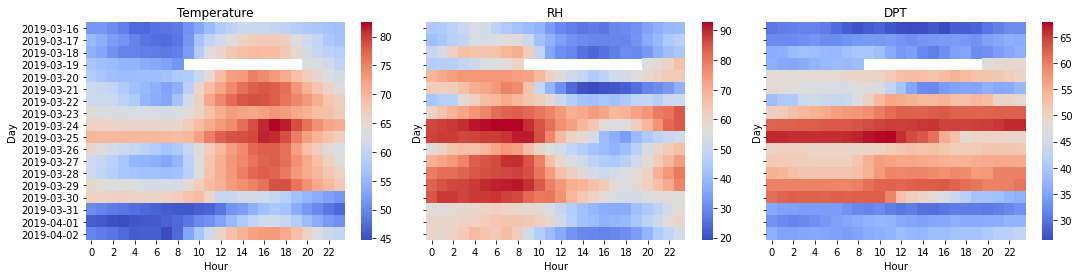

In [55]:
var_dfs = [temperature,humidity,dpt]
fig, ax = plt.subplots(1,3,figsize=(18,4),sharey='row')
loc = 0
for var_df, label in zip(var_dfs, ['Temperature','RH','DPT']):
    sns.heatmap(var_df,cmap='coolwarm',ax=ax[loc])
    ax[loc].set_title(label)
    ylabels = np.arange(1,len(var_df)+1,1)
    #ax[loc].set_yticklabels(ylabels)
    
    loc += 1
    
plt.subplots_adjust(wspace=0.05)
plt.show()
plt.close()
    